In [3]:
# Ex)
import numpy as np

x = np.array([1, 2, 3])
# print(x)
# print(np.diag(x))

M = np.random.normal(0, 1, (2, 3))
N = np.random.normal(0, 1, (3, 4))
print(np.matmul(M, N), round(3))
print((M @ N).round(3))


[[ 4.70303918 -1.14604591 -0.71435562  1.09333659]
 [ 1.730067   -0.47127315 -0.05078571  0.38351101]] 3
[[ 4.703 -1.146 -0.714  1.093]
 [ 1.73  -0.471 -0.051  0.384]]


In [27]:
# Linear regression for Minibatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_features = 32, 5
lr = 0.03
t_W = np.random.uniform(-1, 1, n_features).reshape(-1, 1)
t_b = np.random.uniform(-1, 1, 1)
W = np.random.uniform(-1, 1, n_features).reshape(-1, 1)
b = np.random.uniform(-1, 1, 1).reshape(1, 1)
epochs = 100

# generate dataset
# X is transpose matrix
X = np.random.randn(N, n_features)
Y = X @ t_W + t_b

J_track = list()
W_track, b_track = list(), list()

for epoch in range(epochs):
    W_track.append(W)
    b_track.append(b)

    # loss calculation
    Pred = X @ W + b
    J0 = (Y - Pred)**2
    J = np.mean(J0)
    J_track.append(J)

    # jacobians
    dJ_dJ0 = 1/N*np.ones((1, N))
    dJ0_dPred = np.diag(-2*(Y - Pred).flatten())
    dPred_dW = X
    dPred_db = np.ones((N, 1))

    # backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dW = dJ_dPred @ dPred_dW
    dJ_db = dJ_dPred @ dPred_db
        
    # parameter update
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db

W_list = np.hstack(W_track)
b_list = np.concatenate(b_track)

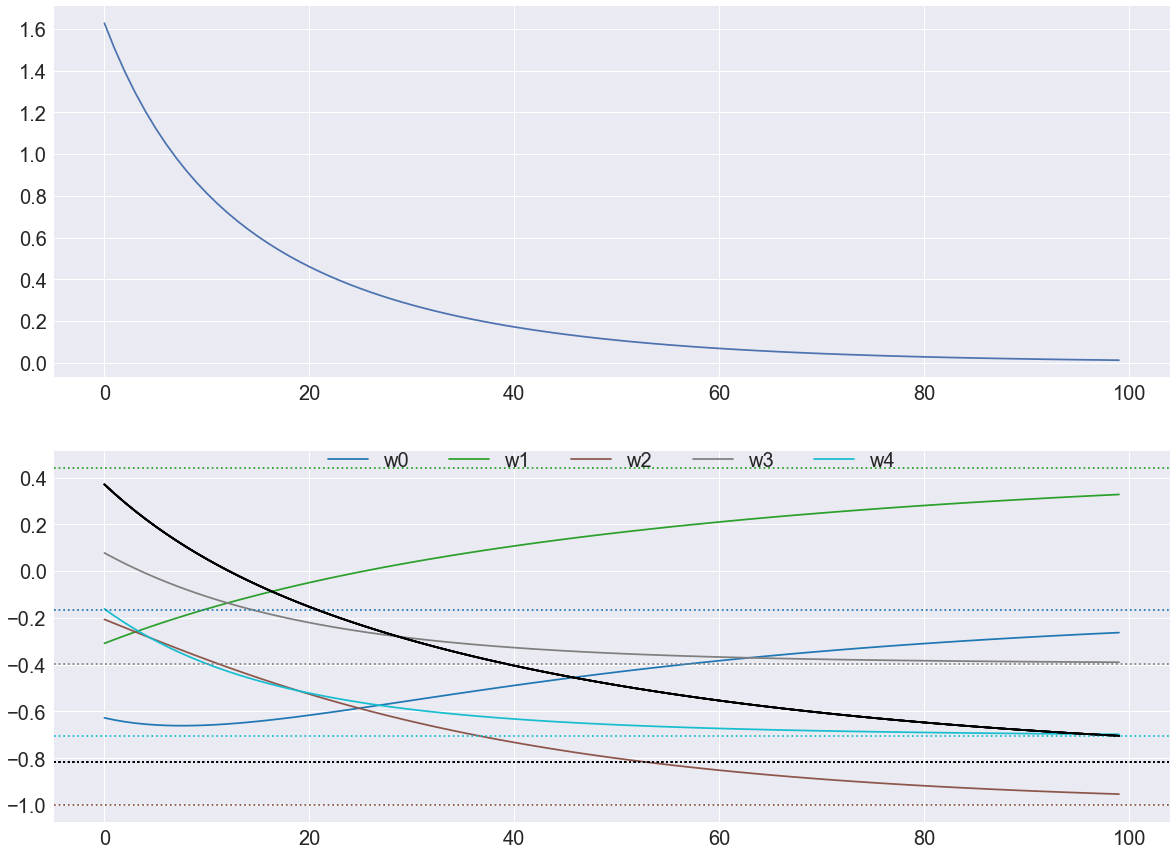

In [28]:
# visualize results
cmap = cm.get_cmap('tab10', n_features)
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes[0].plot(J_track)

for w_idx, w_list in enumerate(W_list):
    axes[1].plot(w_list, color=cmap(w_idx), label='w' + str(w_idx))
for w_idx, t_w in enumerate(t_W):
    axes[1].axhline(y=t_w, linestyle=':', color=cmap(w_idx))
    axes[1].plot(b_list, color='black')
    axes[1].axhline(y=t_b, linestyle=':', color='black')
    axes[1].legend(fontsize=20, loc='lower center',bbox_to_anchor=(0.5, 0.9), ncol=n_features)
    axes[0].tick_params(labelsize=20)
    axes[1].tick_params(labelsize=20)

In [53]:
# Logistic regression for Minibatch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 5000, 3
lr =0.01
epoch = 500
b_size =256

t_W = np.random.uniform(-1, 1, (n_features, 1))
t_b = np.random.uniform(-1, 1, (1, 1))
W = np.random.uniform(-1, 1, (n_features, 1))
b = np.random.uniform(-1, 1, (1, 1))

n_batch = N // b_size

# generate dataset
x_data = np.random.normal(0, 1, (N, n_features))
y_data = x_data @ t_W + t_b
y_data = (y_data > 0).astype(np.int)

# training
J_track =list()
acc_track = list()
for epoch in range(epochs):
    for b_idx in range(n_batch):
        
        # get minibatches
        X = x_data[b_idx*b_size: (b_idx+1)*b_size, ...]
        Y = y_data[b_idx*b_size: (b_idx+1)*b_size, ...]

        # forward propagattion
        z = X @ W + b
        Pred =  1/ (1+ np.exp(-z))
        J0 = -(Y*np.log(Pred) + (1 - Y)*np.log(1 - Pred))
        J = np.mean(J0)
        J_track.append(J)

        # calculate accuracy
        Pred_ = (Pred > 0.5).astype(np.int)
        n_correct = np.sum(Pred_ == Y).astype(np.int)
        acc = n_correct / b_size
        acc_track.append(acc)

        # jacobians
        dJ_dJ0 = 1/N*np.ones((1, b_size))
        dJ0_dPred = np.diag(((Pred - Y)/(Pred*(1-Pred))).flatten())
        dPred_dz = np.diag((Pred*(1-Pred)).flatten())
        dz_dW = X
        dz_db = np.ones((b_size, 1))

        # backpropagation
        dJ_dPred = dJ_dJ0 @ dJ0_dPred
        dJ_dz = dJ_dPred @ dPred_dz
        dJ_dW = dJ_dz @ dz_dW
        dJ_db = dJ_dPred @ dz_db

        # parameter update
        W = W - lr*dJ_dW.T
        b = b - lr*dJ_db



<ipython-input-53-06f8c61034fd>:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (y_data > 0).astype(np.int)
<ipython-input-53-06f8c61034fd>:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

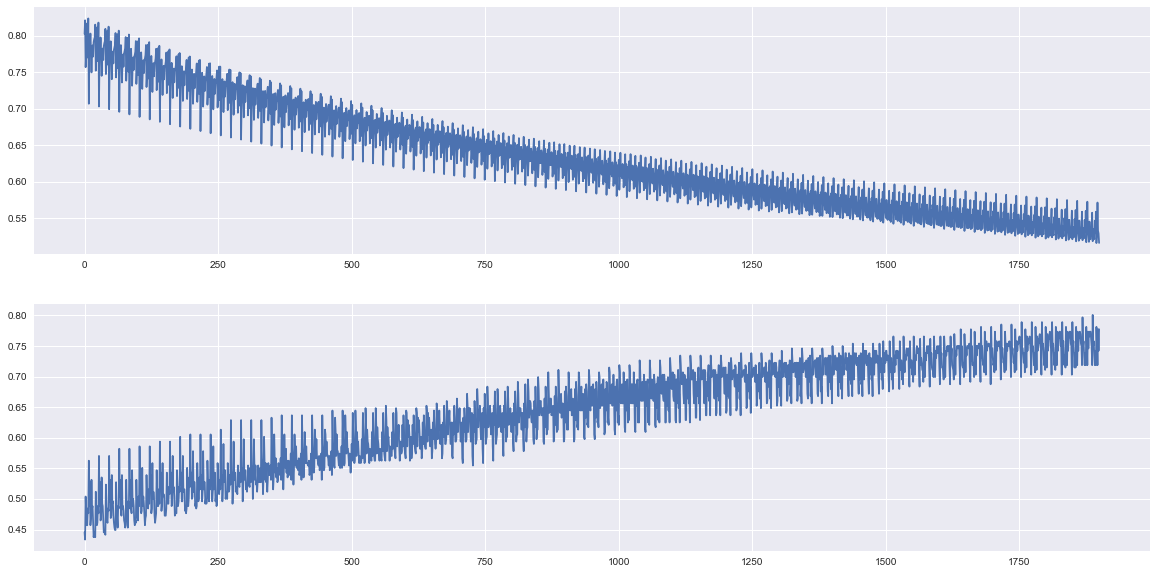

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)